In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

from biomarker.models import Ensemble
from biomarker.data_collection import *

import numpy as np

data_collection


In [2]:
EXCLUDE_KEYS = [206, 205, 184, 183, 82, 81, 45]
TEST_KEYS = [217, 216]

In [3]:
##linear/tree 2,2
##linear/linear 2,2
##tree / liner 0,0
##linear/ linear 1,1 
ensemble = Ensemble(meta_model='tree',regressor='linear')

In [4]:
excel = parse_master_file(exclude_keys=EXCLUDE_KEYS)
# alter the weighting of low logK values:
excel = duplicate_master(excel, 3, 20, how='lt')
L = get_filename_list(excel['Associated data'])

[3, 9]


In [5]:
x1 = create_x1_matrix(L)
x4 = create_x4_matrix(L)
x5 = create_x5_matrix(L)
x6 = create_x6_matrix(L)
x7 = create_x7_matrix(L)

y = excel['Output: logK'].values
y_buck = excel['Output: logKbucket'].values

In [6]:
x4.shape

(636, 150)

In [7]:
x10_x17 = excel.iloc[:, 3:-2]
master, master_names = prepare_master(x10_x17)

In [8]:
x1_train = x1[:-2]
x4_train = x4[:-2]
x5_train = x5[:-2]
x6_train = x6[:-2]
x7_train = x7[:-2]
master_train = master[:-2]

# y_train = y[:-2]
y_train = y_buck[:-2]

print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [9]:
ensemble.fit(x1_train,x4_train,x5_train,x6_train,x7_train,master_train,y_train)

In [10]:
prediction = ensemble.predict(x1[-2:], x4[-2:], x5[-2:], x6[-2:], x7[-2:], master[-2:])

In [11]:
prediction

array([0, 0])

In [12]:
prediction - y_buck[-2:]

array([0, 0])

<IPython.core.display.Javascript object>


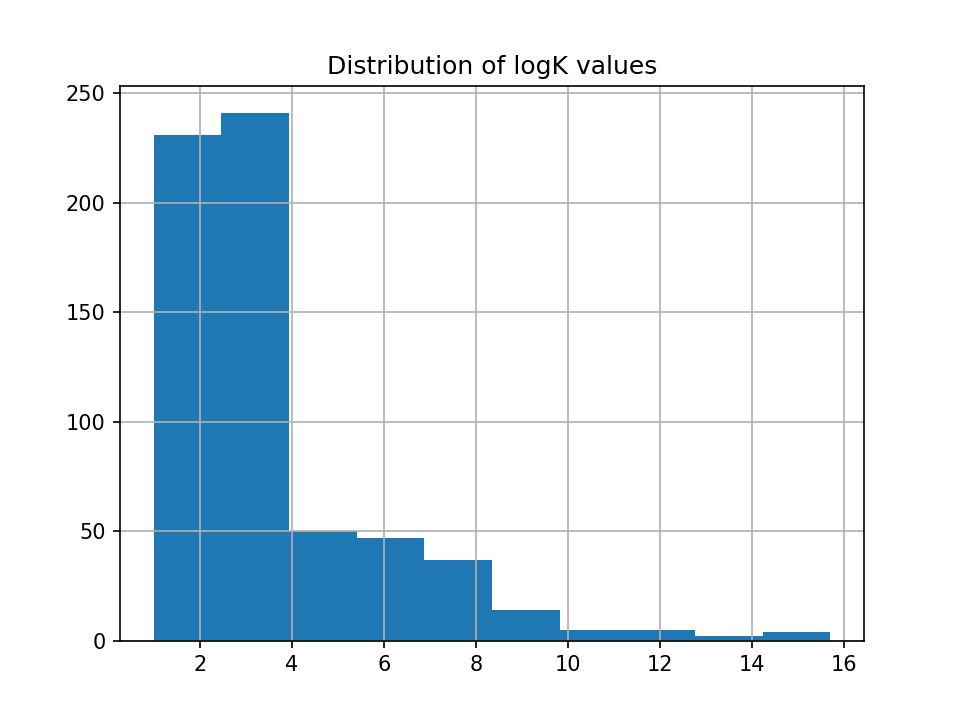

Text(0.5,1,'Distribution of logK values')

In [13]:
excel['Output: logK'].hist().set_title('Distribution of logK values')